# Import Necessary Libaries

In [41]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import glob
import os
import cv2
import numpy as np

# Load Model 

Import the model onto the notebook.

In [62]:
# Load model
model_path = "/Users/ray/Desktop/Atoll Files/Models/NIR-KMeans-Aug-Resnet/NIR-KMeans_Aug_model"

model = load_model(model_path)


# Import Images Used for Prediction

In [63]:
# Required before prediction
def standardize(img):
    # Standardization of images using adjusted standard deviation

    N = np.shape(img)[0] * np.shape(img)[1]
    s = np.maximum(np.std(img), 1.0 / np.sqrt(N))
    m = np.mean(img)
    img = (img - m) / s
    del m, s, N
    #
    if np.ndim(img) == 2:
        img = np.dstack((img, img, img))

    return img

# Prediction Folder
Change the 'folder' path to the folder of images you will use for prediction.

In [78]:
# Initialize lists to store training images and their filenames
train_predict = []
train_predict_list = []

# Define the path to the image folder and the image size
prediction_folder = "/Users/ray/Desktop/Test Set/NIR/"
SIZE_X = 256 # width of the image
SIZE_Y = 256 # height of the image

# Loop over all files in the folder
for directory_path in sorted(glob.glob(prediction_folder)):
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))): # Change this depending on file extension
        
        # Read each image file
        img = cv2.imread(img_path)
        # Convert the image from BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize the image to the specified size
        img = cv2.resize(img,(SIZE_X,SIZE_Y), interpolation = cv2.INTER_CUBIC)

        # Standardize images for predictions
        img = standardize(img)
        # Append the standardized image to the train_predict list
        train_predict.append(img)

        # Extract the filename from the full path and append it to train_predict_list
        filename = os.path.basename(img_path)[:-4] # Change this depending on the file ending 
        train_predict_list.append(filename)

# Convert train_predict to numpy array
train_predict = np.array(train_predict)

print(train_predict.shape)  # Print out the shape of train_predict


(28, 256, 256, 3)


# Ground Truth Folder

Import the folder to the ground truth in which you will compare your predictions to

In [69]:
ground_truth = []

# Define the path to the image folder and the image size
ground_folder = "/Users/ray/Desktop/Actual_Test_Set/"
SIZE_X = 256 # width of the image
SIZE_Y = 256 # height of the image

# Loop over all files in the folder
for directory_path in sorted(glob.glob(folder)):
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))): # Change this depending on file extension
        
        # Read each image file
        img = cv2.imread(img_path,0)
       
        # Append the standardized image to the train_predict list
        ground_truth.append(img)


# Convert train_predict to numpy array
ground_truth = np.array(ground_truth)

print(ground_truth.shape)  # Print out the shape of train_predict


(28, 256, 256)


# Do Prediction with Model

In [66]:
# Run in case classifications get switched
def transform_array(arr):
    # Get unique values and their counts
    unique_values, counts = np.unique(arr, return_counts=True)

    # Get the indices that would sort counts in ascending order
    sorted_indices = np.argsort(counts)

    # Map original values to new values based on their counts
    value_map = {unique_values[sorted_indices[2]]: 0,  # Most common
                 unique_values[sorted_indices[1]]: 2,  # Second most common
                 unique_values[sorted_indices[0]]: 1}  # Least common

    #Use vectorize to apply the mapping to the entire array
    vectorized_map = np.vectorize(value_map.get)
    return vectorized_map(arr)


Predict through the whole folder

In [67]:
predicted = []
for i in range(len(train_predict_list)):
  prediction = (model.predict(train_predict)) # Predict on image
  predicted_img=np.argmax(prediction, axis=3)[i,:,:] 
  predicted.append(predicted_img)
 

In [81]:
# Save Predictions to a folder
save_folder = "/Users/ray/Desktop/folder/"
for i in range(len(predicted)):
    plt.imsave(save_folder + train_predict_list[i]+ ".png", predicted[i])

Transform the predictions just in case things were incorreectly classified. Done based off known pixel distributions

In [70]:
predicted = transform_array(predicted)
ground_truth = transform_array(ground_truth)

# Visualize Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


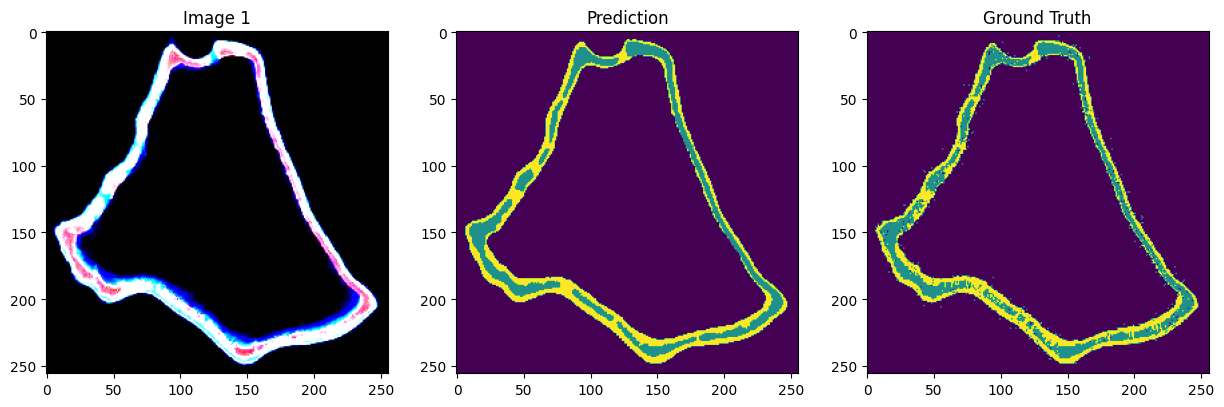

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


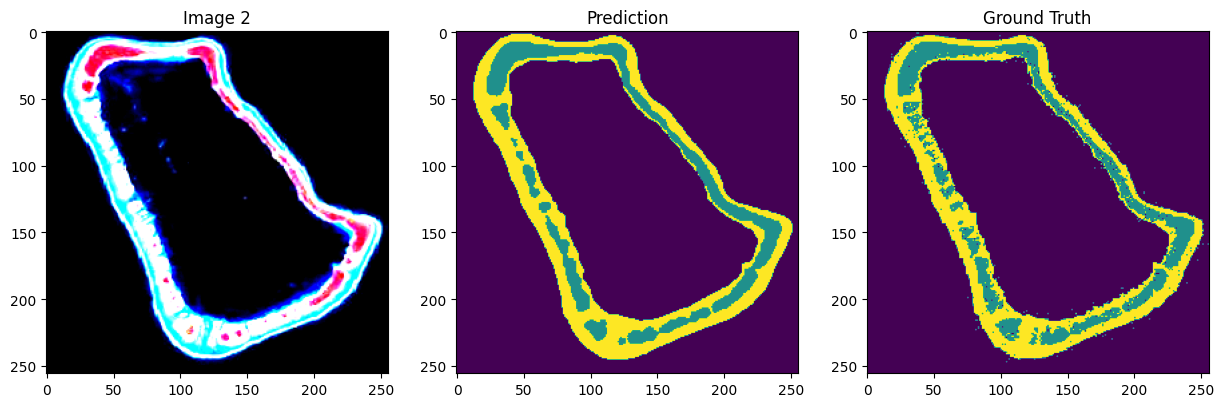

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


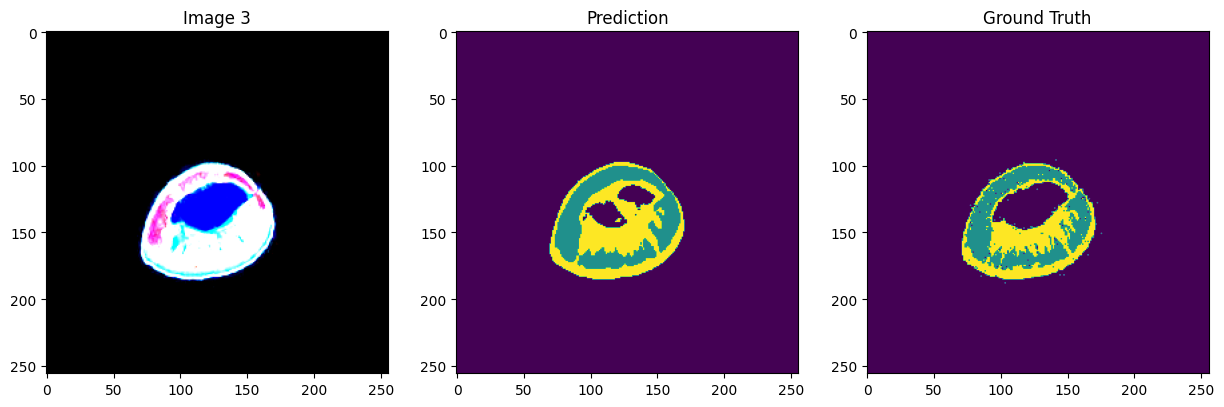

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


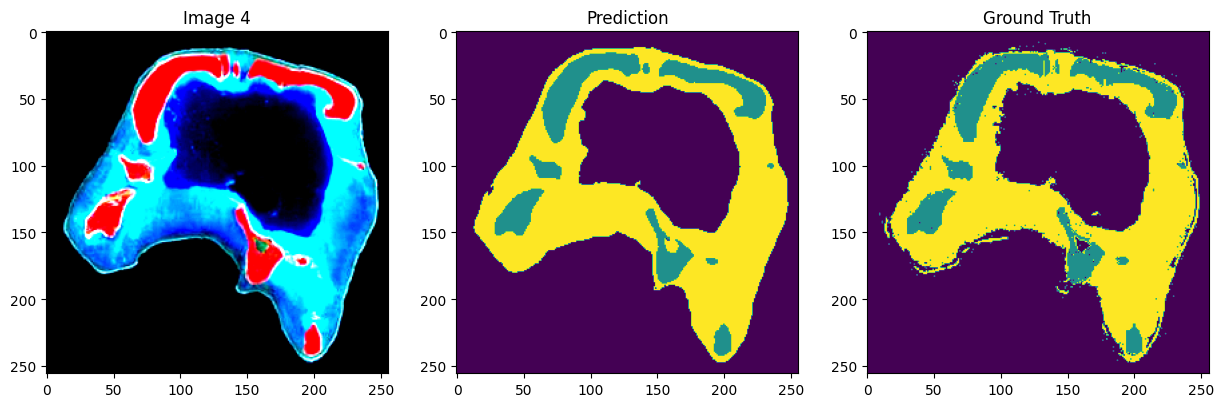

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


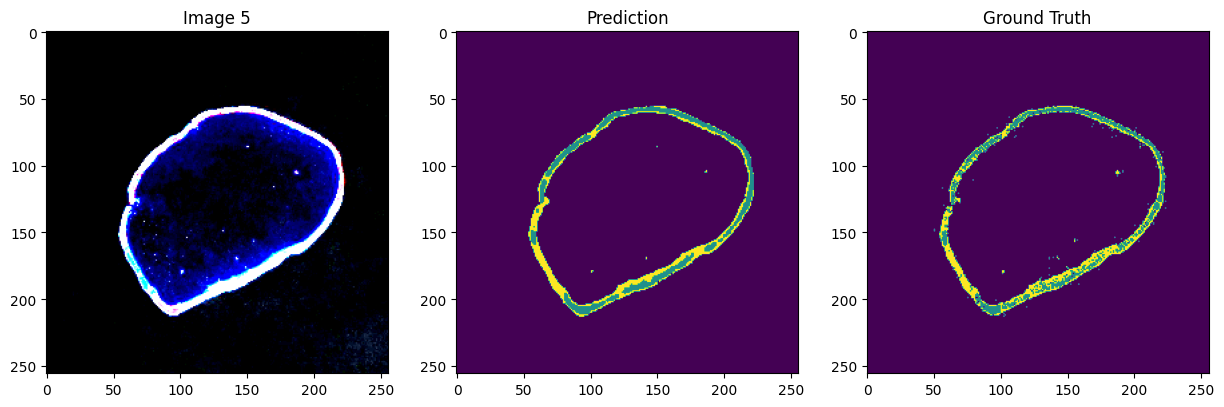

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


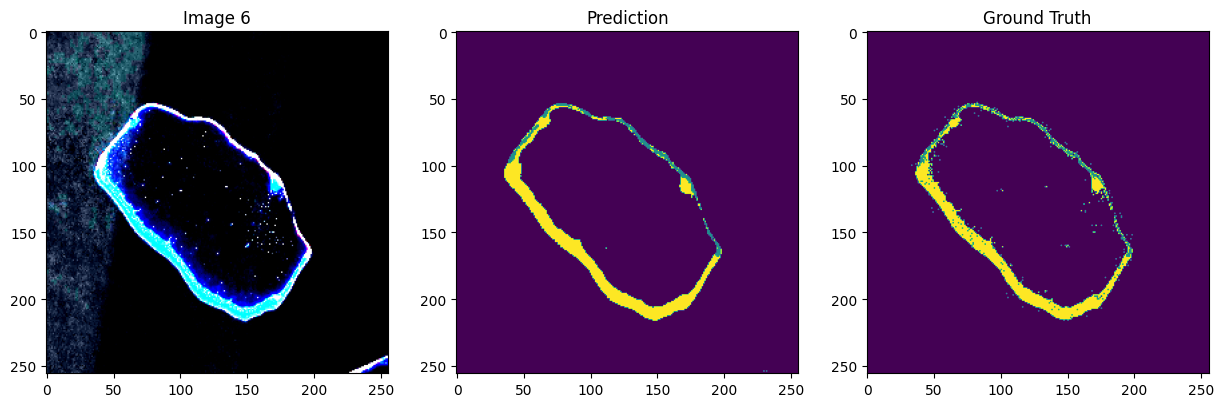

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


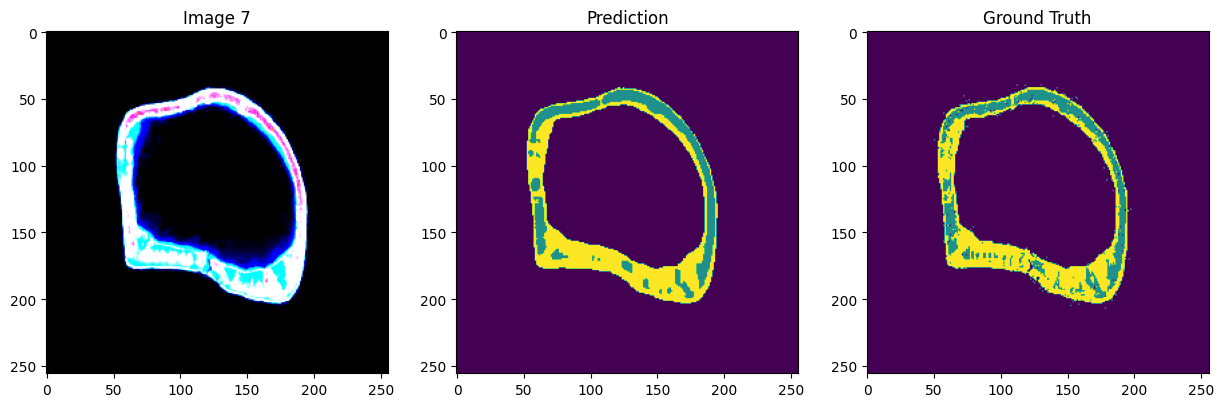

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


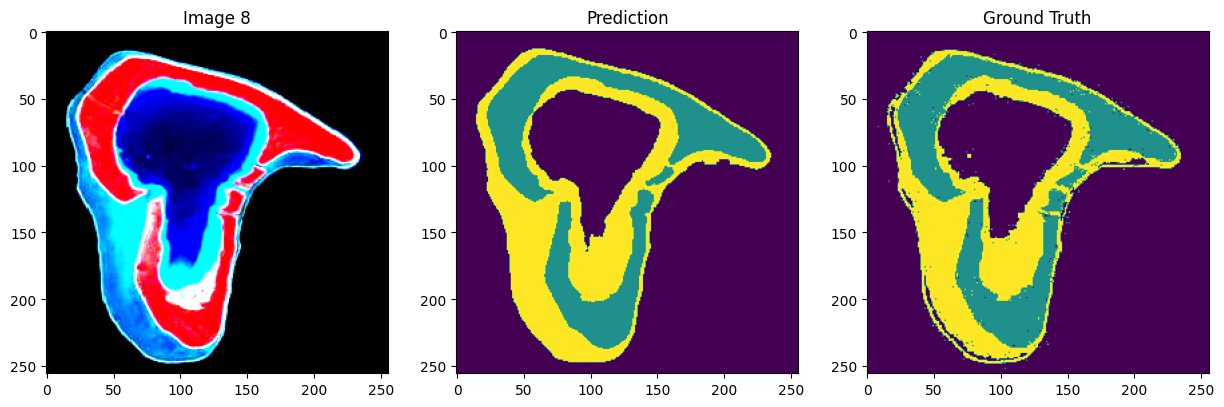

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


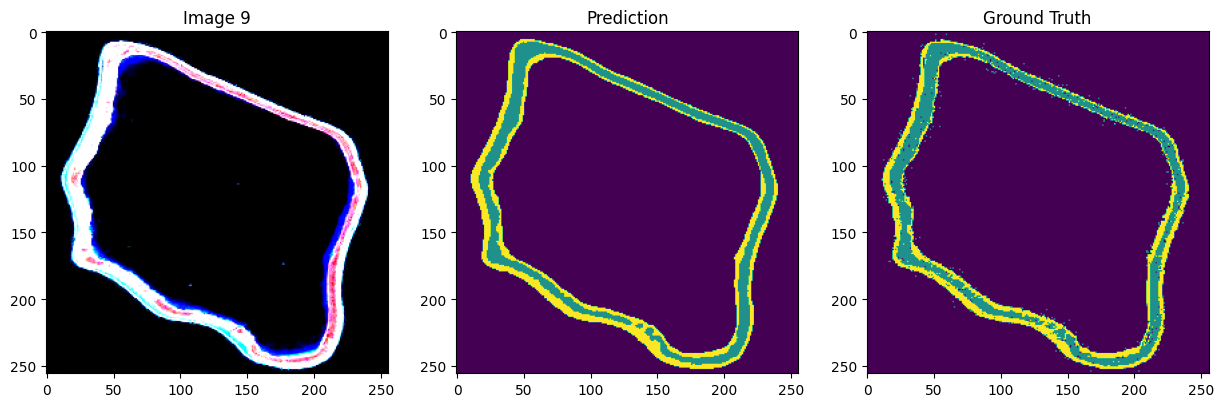

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


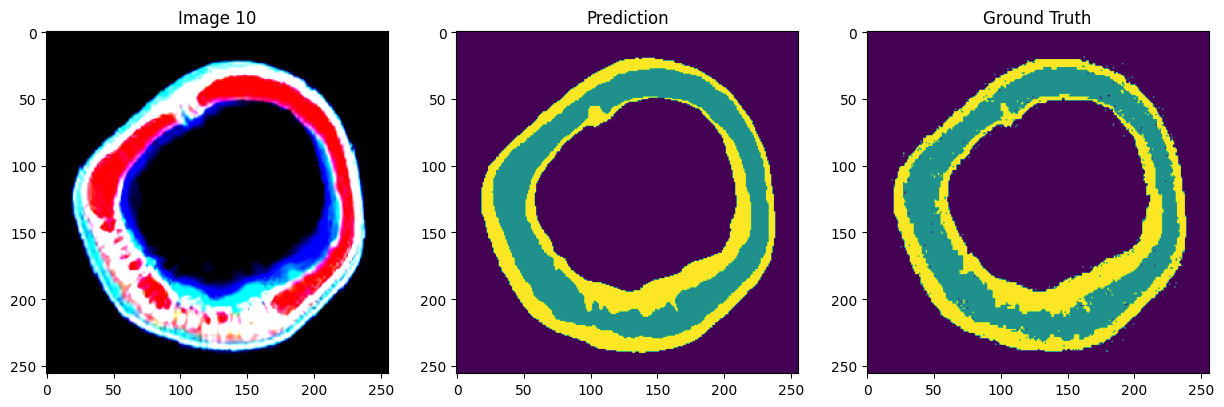

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


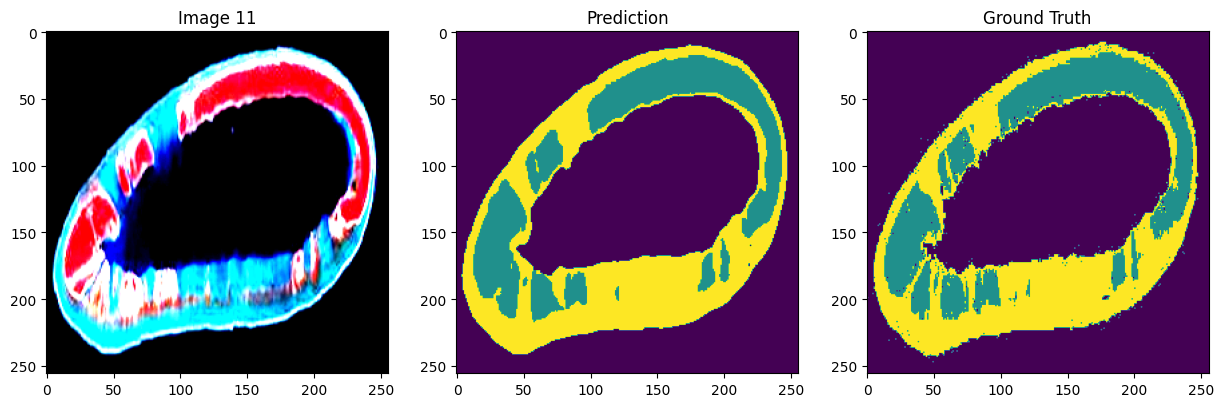

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


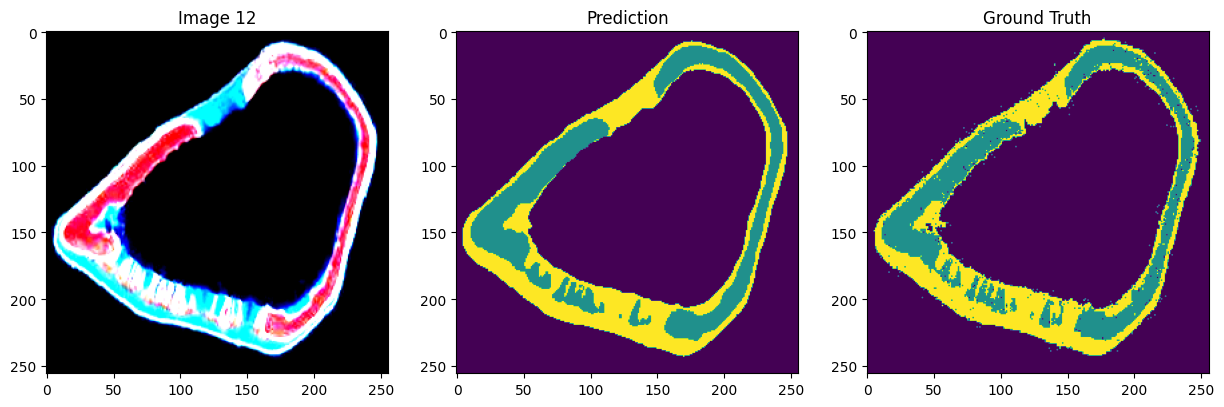

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


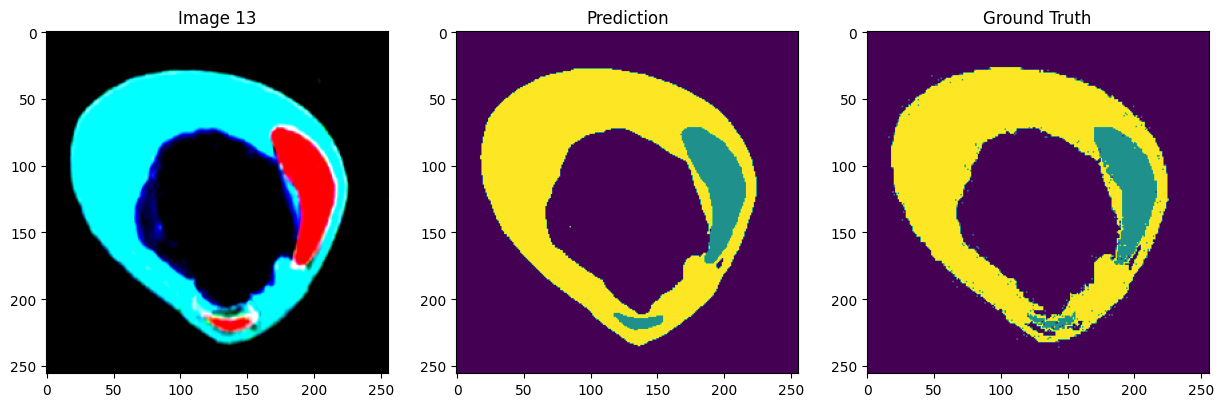

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


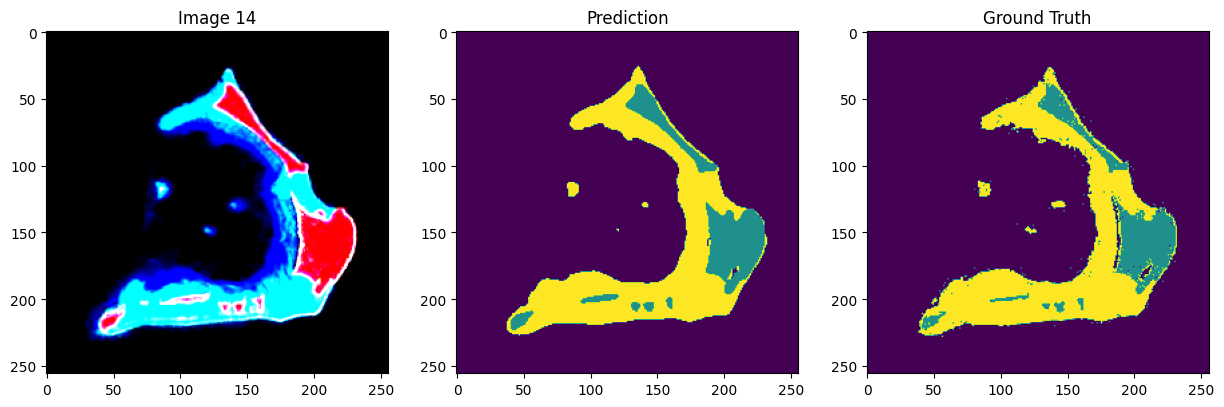

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


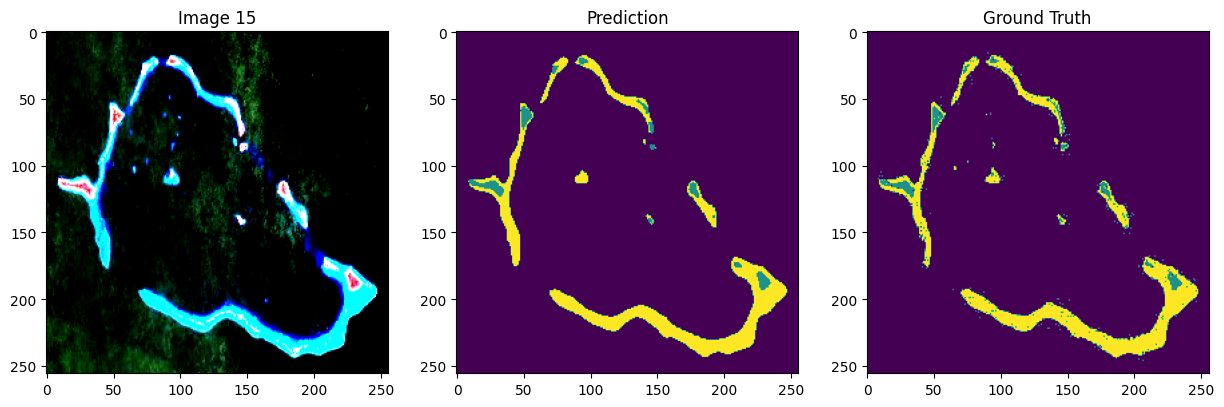

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


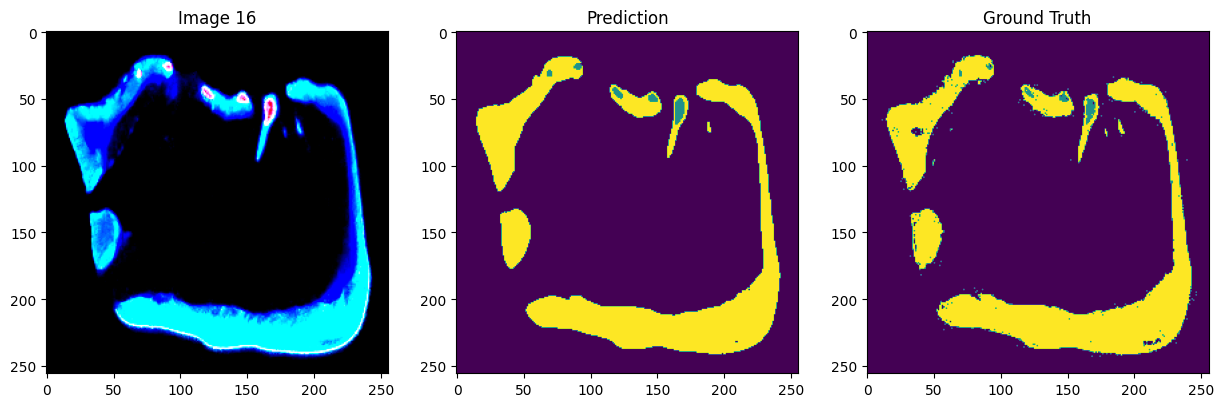

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


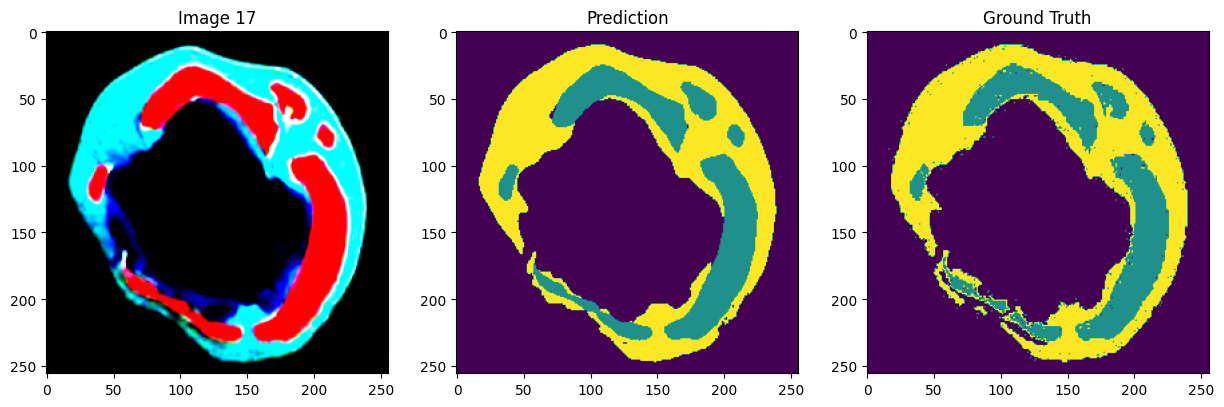

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


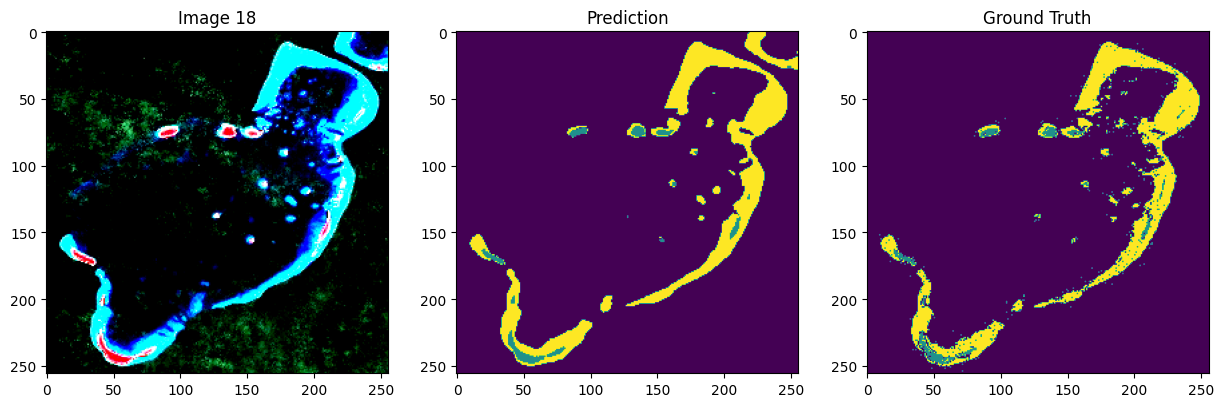

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


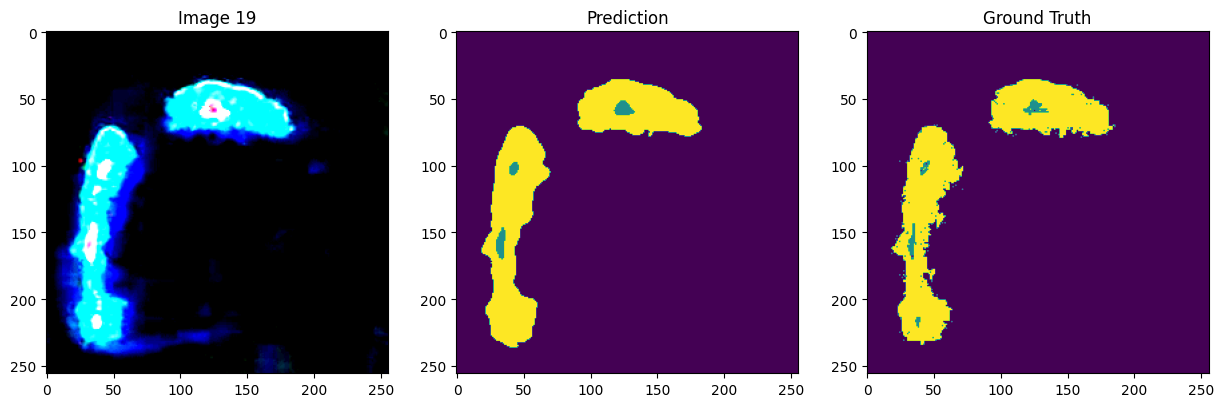

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


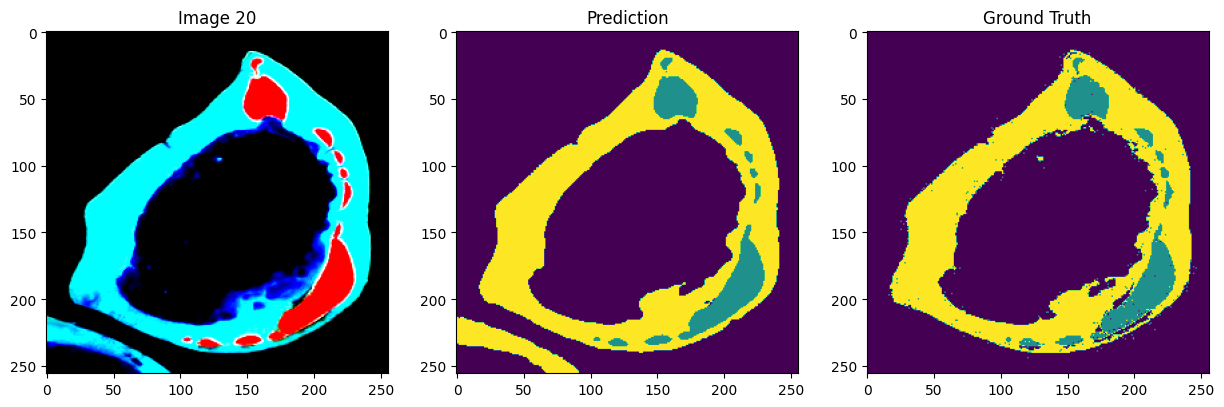

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


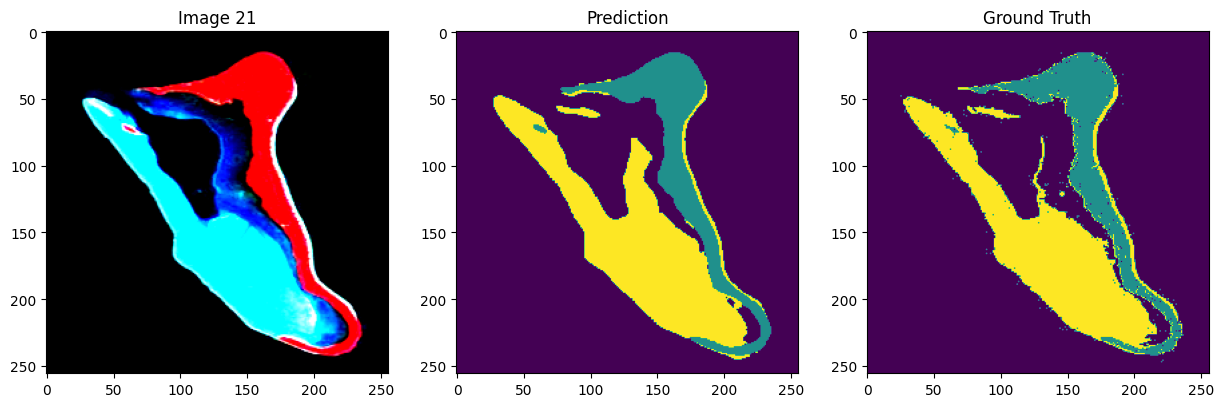

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


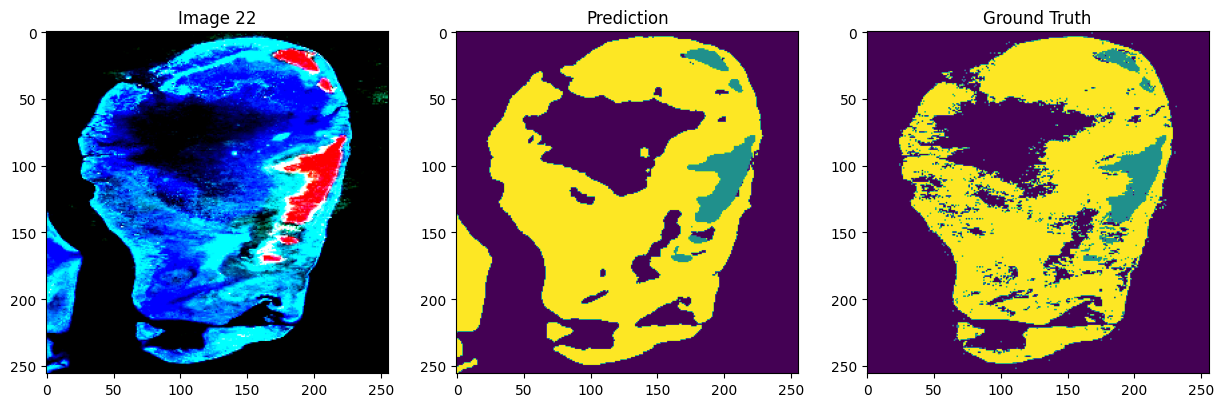

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


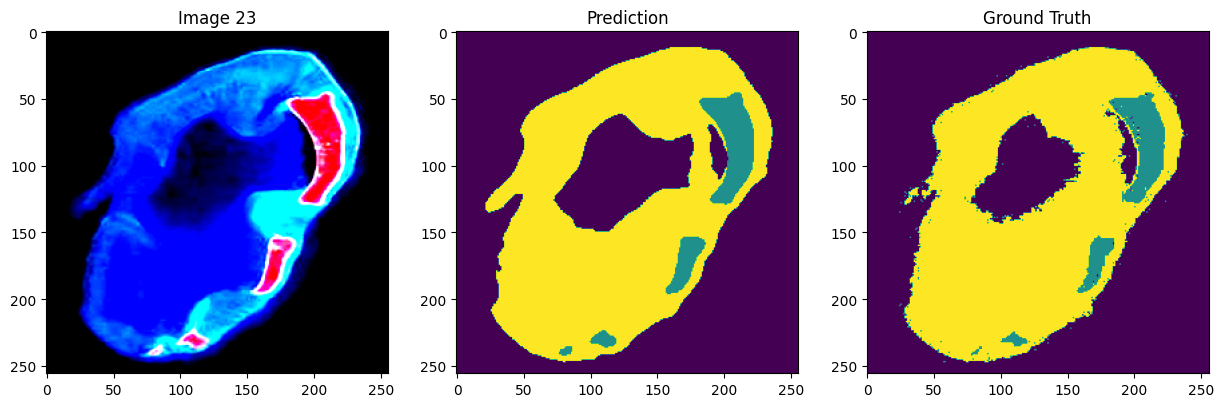

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


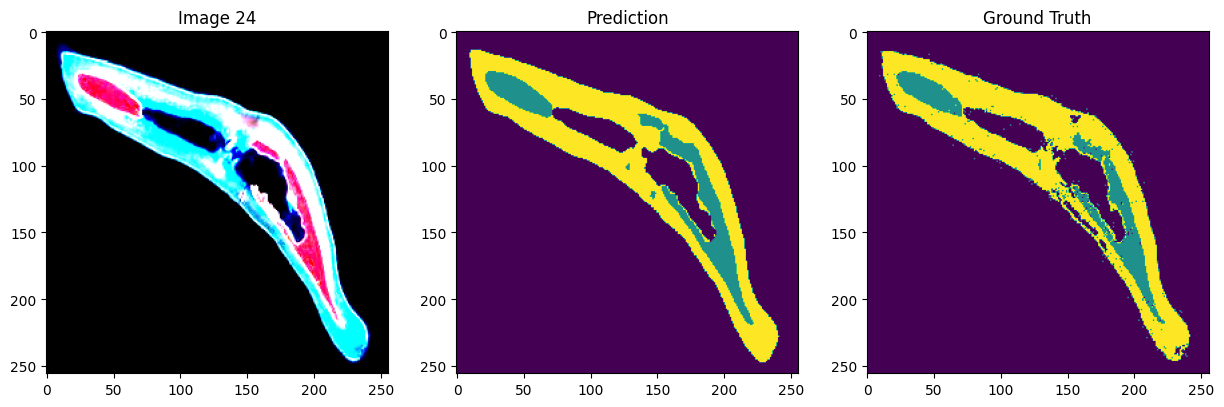

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


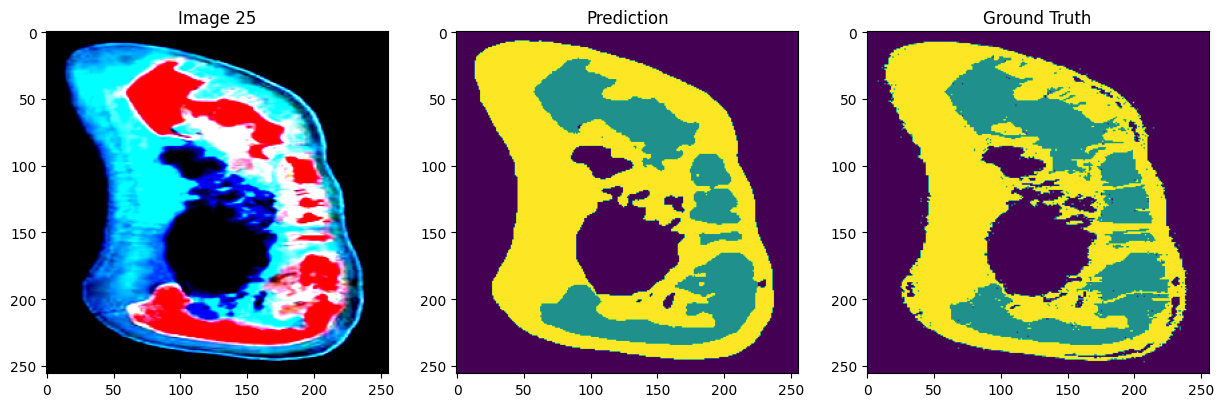

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


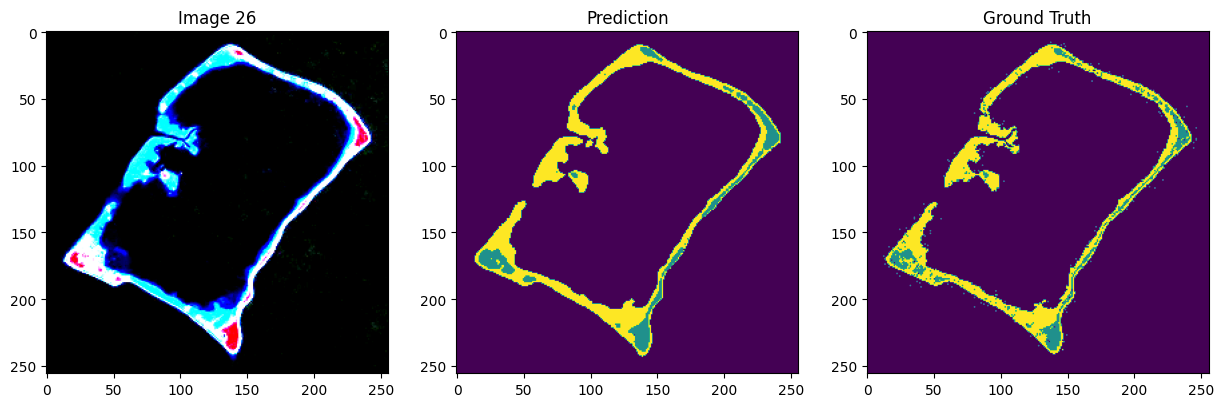

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


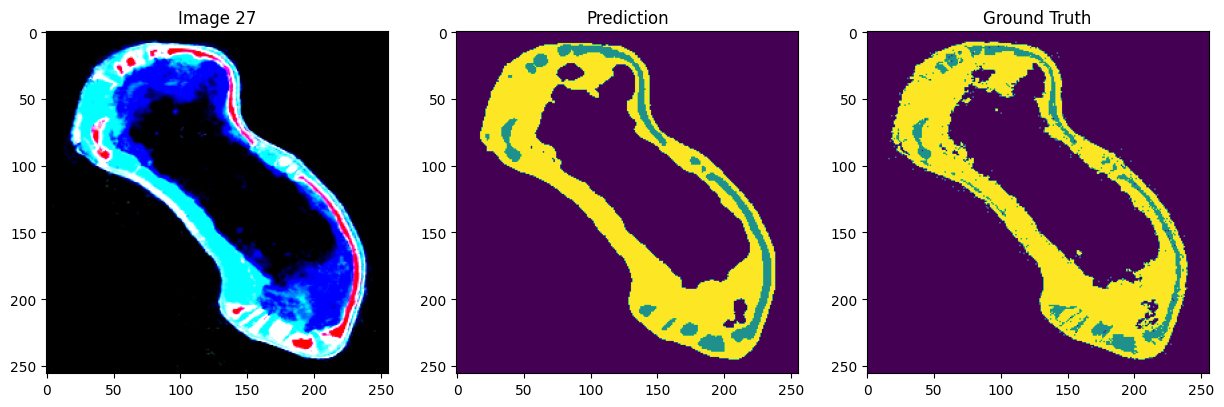

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


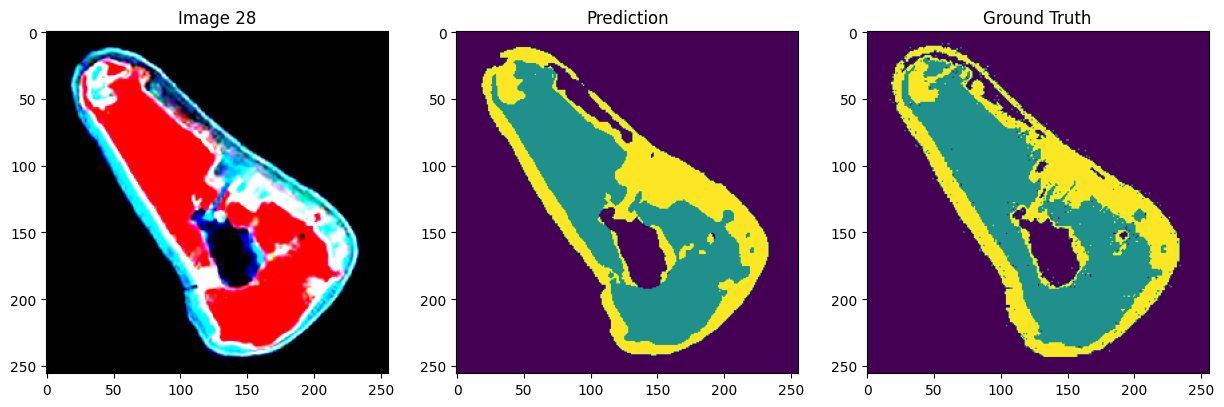

In [73]:
for i in range(len(train_predict)):
    # Create a new figure
    plt.figure(figsize=(15,5))
    
    # Show the original image
    plt.subplot(1, 3, 1)
    plt.imshow(train_predict[i])
    plt.title(f'Image {i+1}')  # replace with actual image name if available
    
     # Show the ground truth
    plt.subplot(1, 3, 3)
    plt.imshow(ground_truth[i])
    plt.title('Ground Truth')
    
    # Show the prediction
    plt.subplot(1, 3, 2)
    plt.imshow(predicted[i])
    plt.title('Prediction')

   
    # Show the figure
    plt.show()

# Compare resutls with Ground Truth

For this section, you will need access to `Analysis.py`. `cd` your way to a location that has access to `Analysis.py` and run the cell below.

In [56]:
%cd /Users/ray/Desktop/

/Users/ray/Desktop


Accuracy: 0.9676802498953683
F1 Score: 0.8979167278872974
Mean IoU for each class: [0.97012608 0.70641664 0.81224739]
Overall Mean IoU: 0.829596702177223


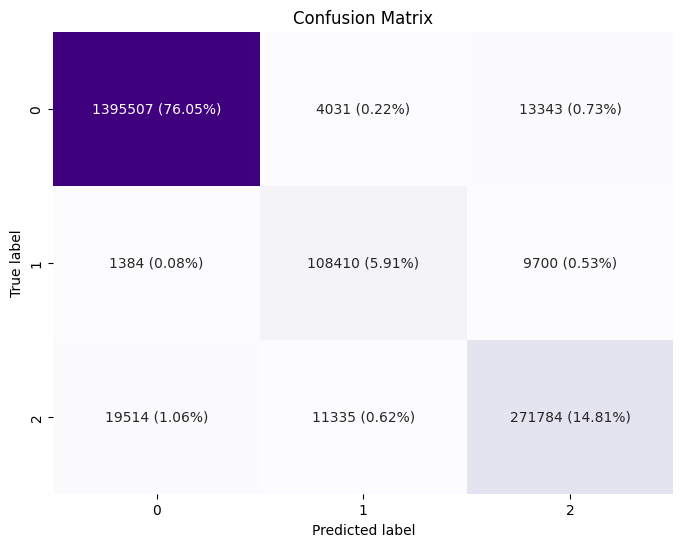

In [55]:
import Analysis
# Usage example
num_classes = 3
Ground_mask = predicted
true_mask = ground

analysis = Analysis.ImageAnalysis(num_classes, Ground_mask , true_mask)
analysis.compute_ious()
mean_ious, overall_mean_iou = analysis.get_mean_ious()
f1 = analysis.compute_f1()
accuracy = analysis.compute_accuracy()
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Mean IoU for each class: {mean_ious}')
print(f'Overall Mean IoU: {overall_mean_iou}')

analysis.plot_confusion_matrix()